<a href="https://colab.research.google.com/github/jre29/lecture1/blob/main/PreProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pobierz dane dotyczące scoringu kredytowego

*Pracujesz jako analityk danych w globalnej firmie finansowej. Przez lata firma gromadziła podstawowe dane bankowe i wiele informacji związanych z kredytami. Kierownictwo chce zbudować inteligentny system do segregowania ludzi w przedziałach oceny kredytowej, aby zmniejszyć wysiłek ręczny.*

**Zadanie na dziś: przygotować dane do modelu**

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MultiLabelBinarizer

import danych

In [13]:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "train.csv"

# Load the latest version
df = kagglehub.load_dataset(KaggleDatasetAdapter.PANDAS, "parisrohan/credit-score-classification", file_path,
)

print("First 5 records:", df.head())

<ipython-input-13-db52f5663265>:9: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(KaggleDatasetAdapter.PANDAS, "parisrohan/credit-score-classification", file_path,


First 5 records:        ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0      19114.12            1824.843333                  3  ...           _   
1      19114.12                    NaN                  3  ...        Good   
2      19114.12                    NaN                  3  ...        Good   
3      19114.12                    NaN                  3  ...        Good   
4      19114.12            1824.843333                  3  ...        Good   

   Outstanding_Debt Credit_Utiliz

/usr/local/lib/python3.11/dist-packages/kagglehub/pandas_datasets.py:91: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  result = read_function(


**Poznaj dane:**

1.   sprawdź wymiary i typy kolumn
2.   usuń duplikaty
3.   usuń zdbędne kolumny
4.   sprawdz liczbę braków danych w poszczególnych kolumnach






In [14]:
df.describe
df.dtypes
df.shape

(100000, 28)

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
missing_values = df.isnull().sum()
print(missing_values)

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64


Usuń kolumny, które nie będą wykorzystywane w analizie ['ID','Customer_ID','SSN','Name']

In [17]:
df.drop(columns=['ID','Customer_ID','SSN','Name'],inplace=True)

In [7]:
df.shape

(100000, 33)

usuń niektore z zbędnych znakow ('_','-'), zmień puste komorki na nan

In [18]:
df = df.replace('', np.nan)

for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype(str).str.replace('_', ' ').str.replace('-', ' ')

In [ ]:
df.head(5)

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit Builder Loan, Personal Loan,...",...,nan,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High spent Small value payments,312.49408867943663,Good
1,February,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit Builder Loan, Personal Loan,...",...,Good,809.98,31.944960,nan,No,49.574949,118.28022162236736,Low spent Large value payments,284.62916249607184,Good
2,March,500,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit Builder Loan, Personal Loan,...",...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low spent Medium value payments,331.2098628537912,Good
3,April,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit Builder Loan, Personal Loan,...",...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low spent Small value payments,223.45130972736786,Good
4,May,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit Builder Loan, Personal Loan,...",...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High spent Medium value payments,341.48923103222177,Good


In [9]:
df.dtypes

,0
Month,object
Age,object
Occupation,object
Annual_Income,object
Monthly_Inhand_Salary,float64
Num_Bank_Accounts,int64
Num_Credit_Card,int64
Interest_Rate,int64
Num_of_Loan,object
Delay_from_due_date,int64


Zmień nazwy miesiecy na zmienne liczbowe zgodnie z kolejnością miesięcy

In [19]:
month_mapping = {
    "January": 1, "February": 2, "March": 3, "April": 4, "May": 5, "June": 6,
    "July": 7, "August": 8, "September": 9, "October": 10, "November": 11, "December": 12
}

df['Month'] = df['Month'].map(month_mapping)
df.fillna(0, inplace=True)
df['Month'] = df['Month'].astype(int)


In [20]:
df.dtypes

,0
Month,int64
Age,object
Occupation,object
Annual_Income,object
Monthly_Inhand_Salary,float64
Num_Bank_Accounts,int64
Num_Credit_Card,int64
Interest_Rate,int64
Num_of_Loan,object
Type_of_Loan,object


Zakoduj zmienne tekstowe: 'Occupation', 'Type_of_Loan', 'Payment_Behaviour', 'Credit_Mix', użyj LabelEncodera

In [21]:
to_encode = ['Occupation', 'Type_of_Loan', 'Payment_Behaviour', 'Credit_Mix']

for col in to_encode:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

Przelicz kolumne Credit_History_Age na liczbę mięsiecy


In [22]:
def convert_to_months(age_str):
    if pd.isnull(age_str):
        return np.nan

    years, months = 0, 0

    parts = age_str.split('and')
    for part in parts:
        if 'Years' in part:
            years = int(part.strip().split()[0])
        elif 'Months' in part:
            months = int(part.strip().split()[0])

    return years * 12 + months

df['Credit_History_Age'] = df['Credit_History_Age'].apply(convert_to_months)

In [ ]:
print(df)

       Month   Age  Occupation Annual_Income  Monthly_Inhand_Salary  \
0          1    23          13      19114.12            1824.843333   
1          2    23          13      19114.12               0.000000   
2          3   500          13      19114.12               0.000000   
3          4    23          13      19114.12               0.000000   
4          5    23          13      19114.12            1824.843333   
...      ...   ...         ...           ...                    ...   
99995      4    25          10      39628.99            3359.415833   
99996      5    25          10      39628.99            3359.415833   
99997      6    25          10      39628.99            3359.415833   
99998      7    25          10      39628.99            3359.415833   
99999      8    25          10     39628.99             3359.415833   

       Num_Bank_Accounts  Num_Credit_Card  Interest_Rate Num_of_Loan  \
0                      3                4              3           4   
1  

In [3]:
df['Type_of_Loan'] = df['Type_of_Loan'].fillna('')
df['Type_of_Loan'] = df['Type_of_Loan'].str.replace(r'\band\b', '', regex=True).str.strip() #removes "and"

# Split and clean the values
df_type_of_loan = df['Type_of_Loan'].str.split(r',\s*')  # Handles different spacing

# Use MultiLabelBinarizer
mlb = MultiLabelBinarizer()
dt = mlb.fit_transform(df_type_of_loan.to_list())  # Ensure correct format

# Convert to DataFrame
encoded_df = pd.DataFrame(data=dt, columns=mlb.classes_)

# Merge with original DataFrame and drop old column
df = df.join(encoded_df).drop(columns=['Type_of_Loan'])

print(df.head())

       ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...     Auto Loan  \
0      19114.12            1824.843333                  3  ...  0          1   
1      19114.12                    NaN                  3  ...  0          1   
2      19114.12                    NaN                  3  ...  0          1   
3      19114.12                    NaN                  3  ...  0          1   
4      19114.12            1824.843333                  3  ...  0          1   

  Credit-Builder Loan  Debt Consolidat

In [ ]:
df.dtypes

,0
Month,int64
Age,object
Occupation,int64
Annual_Income,object
Monthly_Inhand_Salary,float64
Num_Bank_Accounts,int64
Num_Credit_Card,int64
Interest_Rate,int64
Num_of_Loan,object
Type_of_Loan,int64


Zmien inne zmienne na numeryczne

In [23]:
numeric_cols = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
                'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
                'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
                'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
                'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']

for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
df.dtypes

,0
Month,int64
Age,int64
Occupation,int64
Annual_Income,float64
Monthly_Inhand_Salary,float64
Num_Bank_Accounts,int64
Num_Credit_Card,int64
Interest_Rate,int64
Num_of_Loan,int64
Type_of_Loan,int64


Uzupełnij braki w kolumnie Monthly_Inhand_Salary,  Annual_Income, .. średnią

In [28]:
numeric_cols_to_fill = ['Monthly_Inhand_Salary', 'Annual_Income', 'Monthly_Balance',
                         'Credit_History_Age', 'Amount_invested_monthly', 'Outstanding_Debt']

for col in numeric_cols_to_fill:
    if col in df.columns:
        try:
            df[col] = pd.to_numeric(df[col], errors='coerce')
            mean_value = df[col].mean()
            df[col] = df[col].fillna(mean_value)
            print(f"Kolumna {col}: wypełniono braki średnią {mean_value:.2f}")
        except Exception as error:
            print(f"Nie udało się przetworzyć kolumny {col}: {str(error)}")

Kolumna Monthly_Inhand_Salary: wypełniono braki średnią 3564.96
Kolumna Annual_Income: wypełniono braki średnią 176415.70
Kolumna Monthly_Balance: wypełniono braki średnią 30364372469635625254912.00
Kolumna Credit_History_Age: wypełniono braki średnią 201.22
Kolumna Amount_invested_monthly: wypełniono braki średnią 637.41
Kolumna Outstanding_Debt: wypełniono braki średnią 1426.22

Pozostałe braki w uzupełnionych kolumnach:
Monthly_Inhand_Salary      0
Annual_Income              0
Monthly_Balance            0
Credit_History_Age         0
Amount_invested_monthly    0
Outstanding_Debt           0
dtype: int64


Narysuj rozkłady zmiennych 'Annual_Income', 'Monthly_Balance'

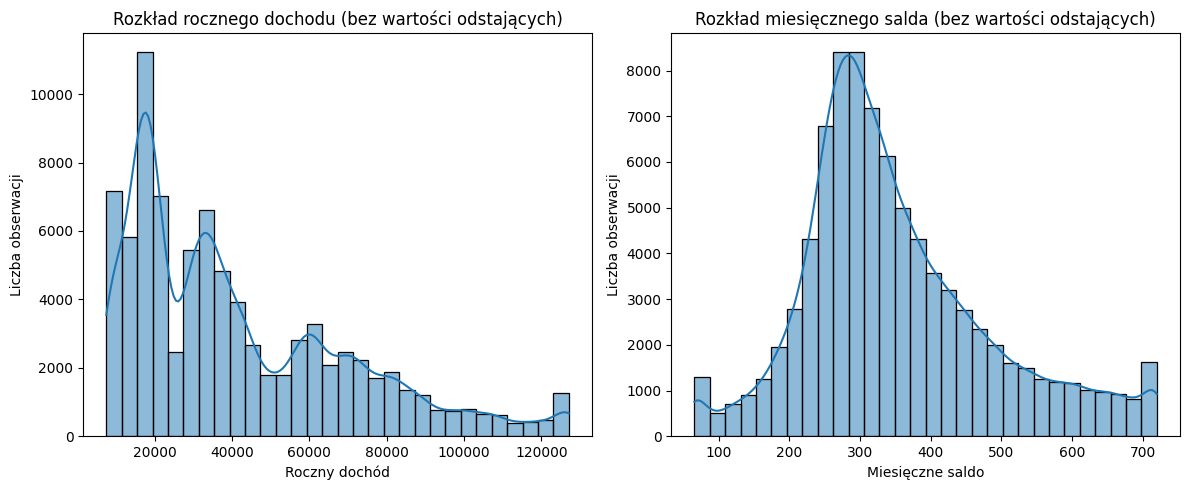

In [30]:
plt.figure(figsize=(12, 5))

df['Annual_Income'] = pd.to_numeric(df['Annual_Income'], errors='coerce')
df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'], errors='coerce')

def clip_outliers(series, percentile_low=0.01, percentile_high=0.99):
    if series.count() > 0:
        low = series.quantile(percentile_low)
        high = series.quantile(percentile_high)
        return series.clip(low, high)
    return series

plt.subplot(1, 2, 1)
clipped_income = clip_outliers(df['Annual_Income'].dropna())
sns.histplot(clipped_income, kde=True, bins=30)
plt.title('Rozkład rocznego dochodu (bez wartości odstających)')
plt.xlabel('Roczny dochód')
plt.ylabel('Liczba obserwacji')

plt.subplot(1, 2, 2)
clipped_balance = clip_outliers(df['Monthly_Balance'].dropna())
sns.histplot(clipped_balance, kde=True, bins=30)
plt.title('Rozkład miesięcznego salda (bez wartości odstających)')
plt.xlabel('Miesięczne saldo')
plt.ylabel('Liczba obserwacji')

plt.tight_layout()
plt.show()

usuń wartości odstające (w przypadku wieku wszystkie ujemne i te powyzej 100 lat)

In [29]:
if 'Age' in df.columns:
    age_mask = (df['Age'] >= 0) & (df['Age'] <= 100) & df['Age'].notna()
    df = df[age_mask]
    print(f"Liczba rekordów po usunięciu odstających wartości wieku: {len(df)}")

def remove_outliers_iqr(df, column):
    if column in df.columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        mask = (df[column] >= lower_bound) & (df[column] <= upper_bound) & df[column].notna()
        filtered_df = df[mask]
        print(f"Kolumna {column}: usunięto {len(df) - len(filtered_df)} wartości odstających")
        return filtered_df
    return df

for col in ['Annual_Income', 'Monthly_Inhand_Salary', 'Monthly_Balance']:
    if col in df.columns:
        df = remove_outliers_iqr(df, col)
        print(f"Liczba rekordów po usunięciu odstających wartości dla {col}: {len(df)}")

Liczba rekordów po usunięciu odstających wartości wieku: 97224
Kolumna Annual_Income: usunięto 2699 wartości odstających
Liczba rekordów po usunięciu odstających wartości dla Annual_Income: 94525
Kolumna Monthly_Inhand_Salary: usunięto 1694 wartości odstających
Liczba rekordów po usunięciu odstających wartości dla Monthly_Inhand_Salary: 92831
Kolumna Monthly_Balance: usunięto 6981 wartości odstających
Liczba rekordów po usunięciu odstających wartości dla Monthly_Balance: 85850


Zwizualizuj korelacje między zmiennymi

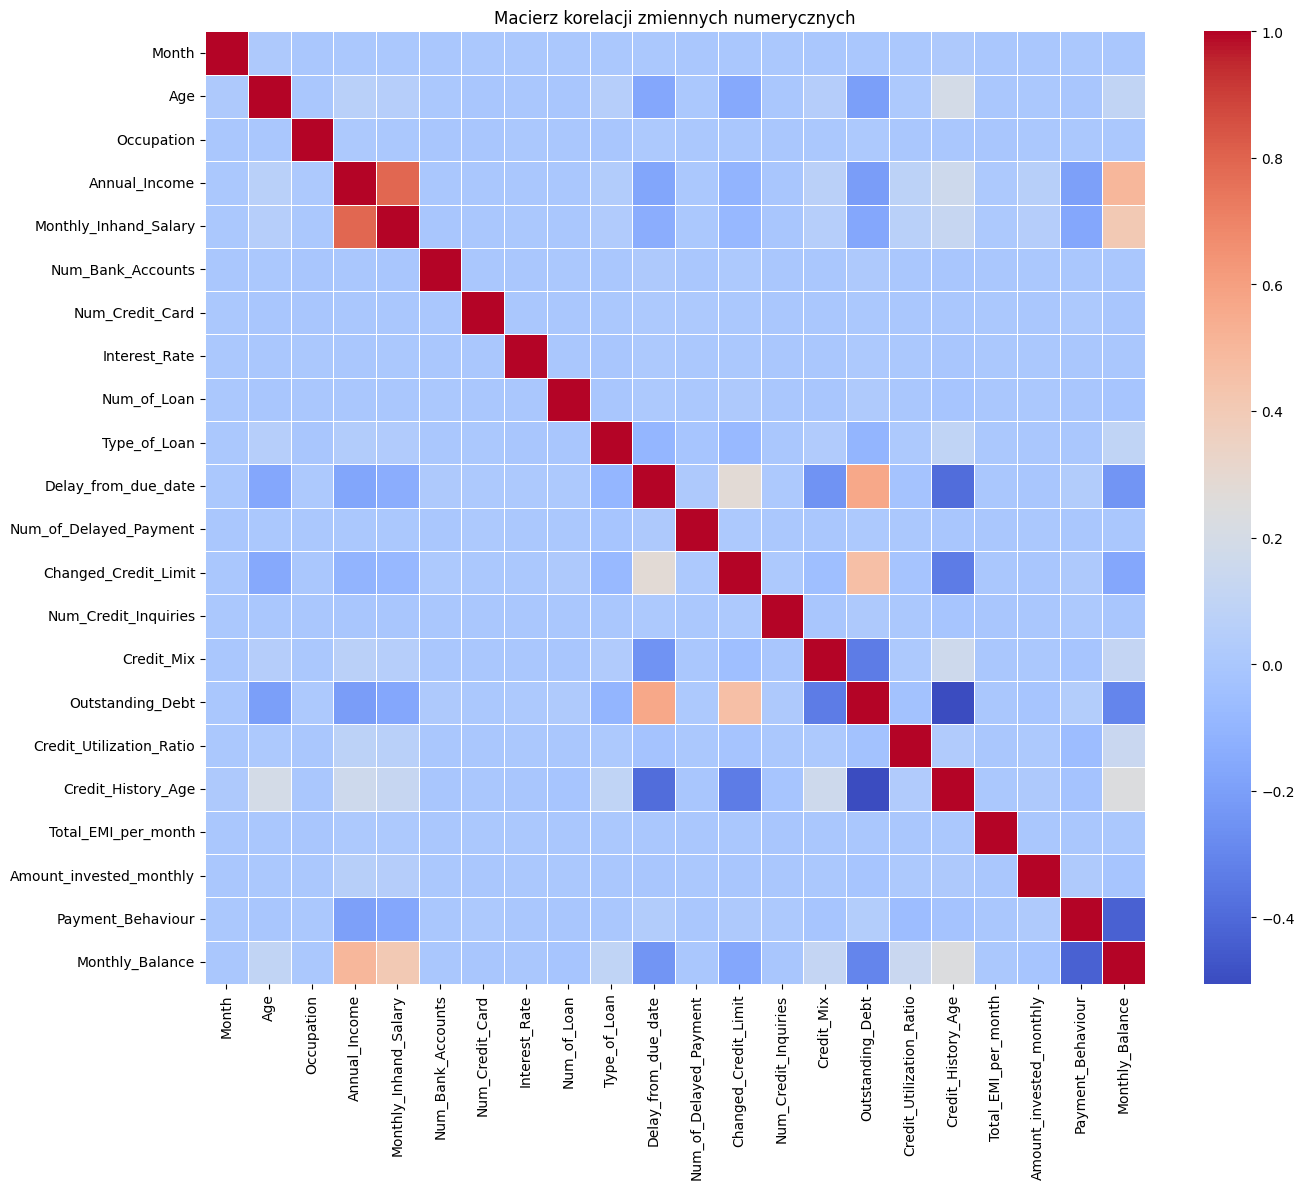

In [31]:
numeric_df = df.select_dtypes(include=[np.number])

corr_matrix = numeric_df.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Macierz korelacji zmiennych numerycznych')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

if 'Credit_Score' in numeric_df.columns:
    target_corr = corr_matrix['Credit_Score'].sort_values(ascending=False)
    print("Najważniejsze korelacje ze zmienną Credit_Score:")
    print(target_corr)



In [33]:
from sklearn.preprocessing import MinMaxScaler
columns_to_scale = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary',
                    'Delay_from_due_date', 'Num_of_Delayed_Payment',
                    'Outstanding_Debt', 'Credit_History_Age',
                    'Total_EMI_per_month', 'Monthly_Balance']

scaler = MinMaxScaler()

df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

print(df.head())

   Month       Age  Occupation  Annual_Income  Monthly_Inhand_Salary  \
0      1  0.104651          13       0.083052                0.16182   
1      2  0.104651          13       0.083052                0.00000   
3      4  0.104651          13       0.083052                0.00000   
4      5  0.104651          13       0.083052                0.16182   
5      6  0.104651          13       0.083052                0.00000   

   Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
0                  3                4              3            4   
1                  3                4              3            4   
3                  3                4              3            4   
4                  3                4              3            4   
5                  3                4              3            4   

   Type_of_Loan  ...  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0           128  ...           0           0.16202                 26.82

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85850 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     85850 non-null  int64  
 1   Age                       85850 non-null  float64
 2   Occupation                85850 non-null  int64  
 3   Annual_Income             85850 non-null  float64
 4   Monthly_Inhand_Salary     85850 non-null  float64
 5   Num_Bank_Accounts         85850 non-null  int64  
 6   Num_Credit_Card           85850 non-null  int64  
 7   Interest_Rate             85850 non-null  int64  
 8   Num_of_Loan               85850 non-null  int64  
 9   Type_of_Loan              85850 non-null  int64  
 10  Delay_from_due_date       85850 non-null  float64
 11  Num_of_Delayed_Payment    79841 non-null  float64
 12  Changed_Credit_Limit      84056 non-null  float64
 13  Num_Credit_Inquiries      85850 non-null  float64
 14  Credit_Mix 